# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

<font color='red'> Reading the csv file </font>

In [55]:
import pandas as pd
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [56]:
data.shape

(89992, 3)

<font color='red'>Create your adjacency matrix </font>

In [57]:
data_user = data.sort_values('user_id')

In [58]:
import numpy as np
edges = [tuple(x) for x in data_user.values.tolist()]

In [59]:
rows =[]
columns =[]
values =[]
for i in range(len(edges)):
    rows.append(edges[i][0])
    columns.append(edges[i][1])
    values.append(edges[i][2])

In [60]:
from scipy.sparse import csr_matrix

In [61]:
adjacency_matrix = csr_matrix((values, (rows, columns)), shape=(max(data['user_id'].unique())+1,max(data['item_id'].unique())+1)).toarray()

In [62]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [63]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [64]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [65]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice

In [66]:
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=10,n_iter=5, random_state=None)

In [67]:
U.shape

(943, 10)

In [68]:
Sigma.shape

(10,)

In [69]:
VT.shape

(10, 1681)

<font color='red'>Compute mean of ratings</font>

In [70]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    mean = pd.DataFrame.mean(ratings)

    return mean

In [71]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [72]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [73]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    return [0] * dim 

In [74]:
dim=943 # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [75]:
dim= 1681 # give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [76]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [77]:
def derivative_db(user_id,item_id,rating,U,V,mu,b_i,c_j):
    '''In this function, we will compute dL/db_i'''
    alpha = 0.01
    loss_term = rating - mu -c_j[item_id] - b_i[user_id] - np.dot(U[user_id],V.T[item_id])
    reg_term = alpha * b_i[user_id]
    return 2*(reg_term - loss_term)


<font color='cyan'>Grader function -4 </font>

In [78]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,b_i,c_j)

grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [79]:
def derivative_dc(user_id,item_id,rating,U,V,mu,b_i,c_j):
    alpha = 0.01
    loss_term = rating - mu -c_j[item_id] - b_i[user_id] - np.dot(U[user_id],V.T[item_id])
    reg_term = alpha * c_j[item_id]
    return 2*(reg_term - loss_term)



<font color='cyan'>Grader function - 5 </font>

In [80]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,b_i,c_j)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [81]:
from sklearn.metrics import mean_squared_error
user = list(data['user_id'])    # Taking the data and putting them on the list
movie = list(data['item_id'])
ratings = list(data['rating'])
epochs =15   

In [82]:
epoch_mse = dict()
learning_rate = 0.40   
b_i = initialize(943)
c_j = initialize(1681)
for epoch in range(1,epochs):
    y_pred = []
    
    for i,j,k in zip(user,movie,ratings):   # for every datapoint
        b_i[i] = b_i[i] - learning_rate*derivative_db(i,j,k,U,VT,mu,b_i,c_j)  # Update user bias
        c_j[j] = c_j[j] - learning_rate*derivative_dc(i,j,k,U,VT,mu,b_i,c_j)  # Update movie bias
        pred = mu + b_i[i] + c_j[j] + np.dot(U[i],VT.T[j])  # Prediction  
        y_pred.append(pred)
    
    mse = mean_squared_error(ratings,y_pred)    # Mean square error
    epoch_mse[epoch] = mse                      # Storing epoch and mean square value
    print('Epoch Number = ',epoch, " MSE = ",mse)

Epoch Number =  1  MSE =  0.002509705802197094
Epoch Number =  2  MSE =  0.0024720502597484094
Epoch Number =  3  MSE =  0.002467525026874053
Epoch Number =  4  MSE =  0.002465648346867718
Epoch Number =  5  MSE =  0.002464680249475032
Epoch Number =  6  MSE =  0.0024641277123167125
Epoch Number =  7  MSE =  0.0024637943440199944
Epoch Number =  8  MSE =  0.002463586858711364
Epoch Number =  9  MSE =  0.0024634556613619255
Epoch Number =  10  MSE =  0.0024633722919870215
Epoch Number =  11  MSE =  0.002463319535187959
Epoch Number =  12  MSE =  0.002463286593498324
Epoch Number =  13  MSE =  0.0024632665285433514
Epoch Number =  14  MSE =  0.0024632548127201982


<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

In [83]:
import matplotlib.pyplot as plt

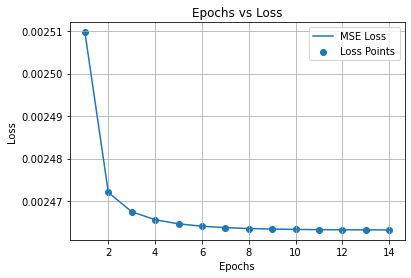

In [84]:
Epoch = list(range(1,50))

plt.plot(list(epoch_mse.keys()),list(epoch_mse.values()),label = 'MSE Loss')


plt.scatter(list(epoch_mse.keys()),list(epoch_mse.values()),label = 'Loss Points')

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.grid()
plt.show()

<br>

<font color='red'> Task 2</font>

In [85]:
user_info =pd.read_csv('user_info.csv.txt')
user_info.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [86]:
user_features = pd.DataFrame(U)

In [87]:
#user_features['age'] =user_info['age']

## Splitting the data

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(user_features, user_info.is_male, test_size=0.3, random_state=25)

In [89]:
len(X_train)

660

In [90]:
len(X_test)

283

In [91]:
X_train

,0,1,2,3,4,5,6,7,8,9
891,0.066117,0.040026,-0.035003,0.034254,-0.032855,-0.062437,-0.021135,-0.007046,0.003468,0.054121
9,0.052518,0.056415,0.074299,-0.017339,0.010885,-0.022902,-0.060706,0.013475,-0.024339,0.009428
134,0.012053,-0.004310,-0.008180,-0.006695,0.042446,-0.007603,-0.016855,-0.003520,-0.002425,-0.037095
150,0.073707,0.078831,0.053715,0.016398,-0.077313,0.065074,0.028644,0.055974,-0.004030,-0.062571
421,0.020811,-0.046170,0.025250,-0.039788,0.016777,-0.025146,-0.005617,0.030351,-0.031946,-0.093583
...,...,...,...,...,...,...,...,...,...,...
317,0.042631,0.014675,0.016820,0.041499,-0.045191,0.055550,-0.009565,-0.036788,-0.040337,0.062360
143,0.052080,-0.023571,0.047689,-0.022217,-0.019541,-0.003064,-0.008785,-0.074864,0.038649,0.039751
474,0.005241,-0.011218,0.017934,0.008731,0.007084,-0.005163,0.015177,-0.009057,0.006097,0.001589
318,0.003189,-0.018424,0.019681,0.030600,0.028514,0.009136,0.009548,-0.002248,-0.010071,0.010258


## Normalizing the data

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 


In [93]:
X_train_normalised = pd.DataFrame()

In [94]:
X_train_normalised = scaler.fit_transform(X_train)
    

In [95]:
X_test_normalised = scaler.transform(X_test)

## Applying decision trees for classification

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### Using Gridsearch to find the best parameters

In [97]:
dt = DecisionTreeClassifier()   

parameters = { 'max_depth' : [1,3,5,7,9,11,13,15,17],
              'min_samples_split' : [5,10,15,20,25,30,35,40,45]}

# using roc and for scoring
clf = GridSearchCV(dt,param_grid=parameters,scoring='roc_auc',cv = 3,verbose=10,n_jobs = -1,return_train_score=True) 

clf.fit(X_train_normalised,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17],
                         'min_samples_split': [5, 10, 15, 20, 25, 30, 35, 40,
                                               45]},
             return_train_score=True, scoring='roc_auc', verbose=10)

In [98]:
clf.best_params_   # Best parameters

{'max_depth': 5, 'min_samples_split': 40}

In [99]:
clf.best_score_   # Best cv score

0.6159825643821452

#### Applying the best parameters on test data

In [100]:
from sklearn.metrics import roc_curve, auc
dt_test = DecisionTreeClassifier(max_depth=5,min_samples_split=40)

dt_test.fit(X_train_normalised,y_train)

y_train_pred = dt_test.predict_proba(X_train_normalised)[:,1]

y_test_pred = dt_test.predict_proba(X_test_normalised)[:,1]


train_fpr,train_tpr,train_thresholds = roc_curve(y_train,y_train_pred)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,y_test_pred)

train_auc = auc(train_fpr,train_tpr)
test_auc  = auc(test_fpr,test_tpr)

<ipython-input-101-e731cf7ac194>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0.5, 1.0, 'AUC')

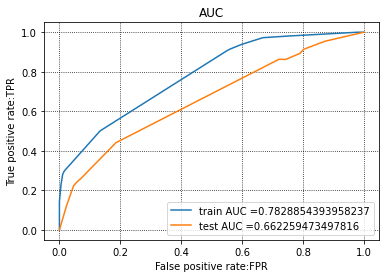

In [101]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(train_auc))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(test_auc))
plt.legend()
plt.grid(b=True, which='major', color='k', linestyle=':')
ax = plt.axes()

ax.set_facecolor("white")
plt.xlabel("False positive rate:FPR")
plt.ylabel("True positive rate:TPR")
plt.title("AUC")

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
y_test_pred_acc = dt_test.predict(X_test_normalised)

In [104]:
test_acc = accuracy_score(y_test,y_test_pred_acc)

In [105]:
y_train_pred_acc = dt_test.predict(X_train_normalised)

In [106]:
train_acc = accuracy_score(y_train,y_train_pred_acc)

In [107]:
train_acc # train accuracy

0.7909090909090909

In [108]:
test_acc  # test accuracy

0.696113074204947

# Observations

* The AUC values are way above than 0.5 which means the model is performing better than simple random model and it means that user features are helpful in determining the gender 

* The train and test accuracies are descent however which indicates that the features are not deterministic
